In [2]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


# Object recognition

Which of the following statements about object recognition and bounding boxes is true?

### Possible Answers


    Bounding boxes are represented by the x and y coordinates of each of the four box corners, so eight numbers altogether.
    
    
    Object recognition's goal is only to identify the spatial location of an object within the image.
    
    
    Bounding boxes are both the way to annotate the training data for object recognition tasks as well as the outputs of the models. {Answer}

**Correct! Box coordinates constitute the ground truth labels as well as model predictions!**

In [5]:
import torch
import torchvision.transforms as transforms
import PIL

image = PIL.Image.open('/home/nero/Documents/Estudos/DataCamp/Python/courses/deep-learning-for-images-with-pytorch/Espresso.jpeg')

bbox = [10, 10, 200, 200]

In [6]:
# exercise 01

"""
Image tensors

A coffee company has an object detection project where they need to annotate objects of interest, in this case, espresso shots. You have created a list with the bounding box coordinates for an espresso shot image. Now, you need to convert the image and the coordinates into tensors.

torch and torchvision have been imported. torchvision.transforms is imported as transforms. The image has been loaded as image using Image.open() from PIL library. The bounding box coordinates are stored in the variable bbox.

espresso
"""

# Instructions

"""

    Convert the bbox into tensors using torch.tensor().
    Reshape bbox_tensor by adding a batch dimension using unsqueeze(0).
    Create a transform to resize image to (224) and transform to an unscaled image tensor.
    Apply transform to image.

"""

# solution

# Convert bbox into tensors
bbox_tensor = torch.tensor(bbox)

# Add a new batch dimension
bbox_tensor = bbox_tensor.unsqueeze(0)

# Resize the image and transform to tensor
transform = transforms.Compose([
  transforms.Resize(244),
  transforms.ToTensor()
])

# Apply transform to image
image_tensor = transform(image)
print(image_tensor)

#----------------------------------#

# Conclusion

"""
Great! Usually, we use transforms.ToTensor() float transformation for images to scale them in the range [0,1]. However, the bounding box requires an unscaled image type with the range [0, 255], so we use transforms.PILToTensor().
"""

tensor([[[0.0000, 0.0000, 0.0039,  ..., 0.0980, 0.0941, 0.0902],
         [0.0000, 0.0000, 0.0039,  ..., 0.1020, 0.0980, 0.0902],
         [0.0000, 0.0000, 0.0000,  ..., 0.1059, 0.1020, 0.0902],
         ...,
         [0.5137, 0.5255, 0.5255,  ..., 0.9098, 0.9098, 0.9059],
         [0.5294, 0.5294, 0.5294,  ..., 0.8863, 0.8902, 0.9020],
         [0.5294, 0.5373, 0.5333,  ..., 0.8863, 0.8902, 0.9020]],

        [[0.0039, 0.0039, 0.0078,  ..., 0.1176, 0.1137, 0.1098],
         [0.0039, 0.0039, 0.0078,  ..., 0.1216, 0.1176, 0.1098],
         [0.0039, 0.0039, 0.0039,  ..., 0.1255, 0.1216, 0.1098],
         ...,
         [0.4706, 0.4824, 0.4824,  ..., 0.7216, 0.7176, 0.7137],
         [0.4745, 0.4863, 0.4863,  ..., 0.6980, 0.7020, 0.7098],
         [0.4745, 0.4824, 0.4863,  ..., 0.6980, 0.7020, 0.7098]],

        [[0.0196, 0.0196, 0.0235,  ..., 0.1294, 0.1255, 0.1216],
         [0.0196, 0.0196, 0.0235,  ..., 0.1333, 0.1294, 0.1216],
         [0.0196, 0.0196, 0.0196,  ..., 0.1373, 0.1333, 0.

'\nGreat! Usually, we use transforms.ToTensor() float transformation for images to scale them in the range [0,1]. However, the bounding box requires an unscaled image type with the range [0, 255], so we use transforms.PILToTensor().\n'

In [11]:
import matplotlib.pyplot as plt
x_min, x_max, y_max, y_min = 70, 190, 180, 17

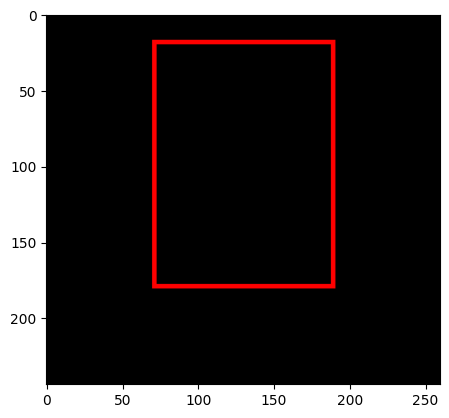

'\nGreat job! The bounding box seems to fit well! In the next video, we will take a look at a more qunatitative approach to evaluating the bounding box accuracy.\n'

In [12]:
# exercise 02

"""
Drawing a bounding box

Having prepared the image and bounding box tensors, you can now draw the box on top of the image and visually inspect its accuracy.

torch, torchvision,torchvision.transforms have been imported. Image has been already transformed to tensors as image_tensor. The coordinates have been assigned to the variables: x_min, y_min, x_max, y_max.
"""

# Instructions

"""


    Import draw_bounding_boxes from torchvision.utils.

    Define the bounding box bbox as list consisting of x_min, y_min, x_max, and y_max.

    Pass image_tensor and bbox_tensor to draw_bounding_boxes to draw the box on top of the image and assign the output to img_bbox.

    Convert the img_bbox tensor to image.

"""

# solution

# Import draw_bounding_boxes
from torchvision.utils import draw_bounding_boxes

# Define the bounding box coordinates
bbox = [x_min, y_min, x_max, y_max]
bbox_tensor = torch.tensor(bbox).unsqueeze(0)

# Implement draw_bounding_boxes
image_tensor = image_tensor.to(torch.uint8)
img_bbox = draw_bounding_boxes(image_tensor, bbox_tensor, width=3, colors="red")

# Tranform tensors to image

transform = transforms.Compose([
    transforms.ToPILImage()
])
plt.imshow(transform(img_bbox))
plt.show()

#----------------------------------#

# Conclusion

"""
Great job! The bounding box seems to fit well! In the next video, we will take a look at a more qunatitative approach to evaluating the bounding box accuracy.
"""

In [ ]:
# exercise 03

"""
Calculate IoU

You have been asked to calculate the Intersection over Union (IoU) metric between each of the three predicted bounding boxes (box_a,box_b,box_c) and the ground truth box bbox.

Which predicted box is the closest to the ground truth?

box_iou has been imported from torchvision.ops. box_a, box_b, box_c, bbox has been already converted to torch.int type tensors with an additional batch dimension.
"""

# Instructions

"""
Possible answers
    
    box_a
    
    box_b
    
    box_c
"""

# solution

from torchvision.ops import box_iou

boxes = [box_a, box_b, box_c]
for box in boxes:
    prinbt(box_iou(box, bbox))

#----------------------------------#

# Conclusion

"""
Great! The best box scores the IoU > 0.5, indicating it's a good match!
"""

'\n\n'

In [ ]:
# exercise 04

"""
Bounding boxes prediction

You have trained an object recognition model. Now, you want to use to generate bounding boxes and classifications for a test image.

The model is available as model and it's already in the evaluation mode. The test_image is also available, and torch and torch.nn as nn have been imported.
"""

# Instructions

"""

    Get the model's output for the test_image and assign it to output.

    Extract the predicted bounding boxes from the output and assign them to boxes.

    Extract the predicted scores from the output and assign them to scores.

"""

# solution

# Get model's prediction
with torch.no_grad():
    output = model(test_image)

# Extract boxes from the output
boxes = output[0]['boxes']

# Extract scores from the output
scores = output[0]['scores']

print(boxes, scores)

#----------------------------------#

# Conclusion

"""
Great! Predicted box coordinates and their confidence scores are important values for understanding how the model is performing.
"""

'\n\n'

In [ ]:
# exercise 05

"""
Calculate NMS

Having extracted the predicted bounding boxes and scores from your object recognition model, your next task is to ensure that only the most accurate and non-overlapping predicted bounding boxes are retained by using the non-max suppression technique.

boxes and scores you created in the previous exercise are available in your workspace and torch and torchvision have been imported.
"""

# Instructions

"""

    Import nms from torchvision.ops.

    Set the IoU threshold to be equal 0.5.

    Apply non-max suppression passing boxes, confidence_scores, and iou_threshold to the relevant function.

    Use the output indices to filter predicted boxes.

"""

# solution

# Import nms
from torchvision.ops import nms

# Set the IoU threshold
iou_threshold = 0.5

# Apply non-max suppression
box_indices = nms(boxes, scores, iou_threshold)

# Filter boxes
filtered_boxes = boxes[box_indices]

print("Filtered Boxes:", filtered_boxes)

#----------------------------------#

# Conclusion

"""
Well done! You filtered boxes with the highest IoU overlap and highest probability scores. You can make the threshold more strict by decreasing it: feel free to verify that with iou_threshold = 0.2, you will only get a single, best bounding box!
"""

'\n\n'

In [ ]:
# exercise 06

"""
Pre-trained model backbone

It's time to build an R-CNN architecture! You will use the vgg16 pre-trained model's backbone for feature extraction. You also remember to store the output shape of the backbone which will serve as the input shape for the subsequent blocks: the classifier and the box regressor.

torch, torchvision, torch.nn as nn have been imported. The model has been imported as vgg16 with the weights stored in VGG16_Weights.
"""

# Instructions

"""

    Load the pre-trained VGG16 weights.

    Extract in_features from the classifier's first layer using .children() as a sequential block and store it as input_dim.

    Create a backbone as a sequential block using features and .children().

    Print the backbone model.

"""

# solution

# Load pretrained weights
vgg_model = vgg16(weights=VGG16_Weights)

# Extract the input dimension
input_dim = nn.Sequential(*list(vgg_model.classifier.children()))[0].in_features

# Create a backbone with convolutional layers
backbone = nn.Sequential(*list(vgg_model.features.children()))

# Print the backbone model
print(backbone)

#----------------------------------#

# Conclusion

"""
Great job! The pre-trained backbone is essential for extracting features from the input image.
"""

'\n\n'

In [ ]:
# exercise 07

"""
Classifier block

Your next task is to create a classifier block that will replace the original VGG16 classifier. You decide to use a block with two fully connected layers with a ReLU activation in between.

The vgg_model and input_dim you defined in the last exercise are available in your workspace, and torch and torchvision.models have been imported.
"""

# Instructions

"""

    Create a variable num_classes with the number of classes assuming you're dealing with detecting cats and dogs only.

    Create a sequential block using nn.Sequential.

    Create a linear layer with in_features set to input_dim.

    Add the output features to the classifier's last layer.

"""

# solution

# Create a variable with the number of classes
num_classes = 2
    
# Create a sequential block
classifier = nn.Sequential(
	# Create a linear layer with input features
	nn.Linear(input_dim, 512),
	nn.ReLU(),
	# Add the output dimension to the classifier
	nn.Linear(512, num_classes),
)

#----------------------------------#

# Conclusion

"""
Great! Your classifier block is ready.
"""

'\n\n'

In [ ]:
# exercise 08

"""
Box regressor block

Your final task is to create a regressor block to predict bounding box coordinates. You decide to have a block with 2 fully connected layers with a ReLU activation in between, similar to the classifier you defined earlier.

Your vgg_model and input_dim are still available and torch and torchvision.models have been imported.
"""

# Instructions

"""

    Create a variable num_coordinates with the number of boundary box coordinates to predict.

    Define the appropriate input dimension for the first linear layer and set the output dimension to 32.

    Define the appropriate output dimension in the regressor's last layer.

"""

# solution

# Define the number of coordinates
num_coordinates = 4

bb = nn.Sequential(  
	# Add input and output dimensions
	nn.Linear(input_dim, 32),
	nn.ReLU(),
	# Add the output for the last regression layer
	nn.Linear(32, num_coordinates),
)

#----------------------------------#

# Conclusion

"""
Awesome! You have mastered all building blocks of the R-CNN architecture for object recognition!
"""

'\n\n'

In [ ]:
# exercise 09

"""
Anchor generator

Your team is developing object detection models based on the Faster R-CNN architecture and using pre-trained backbones. Your task is to create anchor boxes to serve as reference bounding boxes for proposing potential object regions.

You will create 9 standard anchors (3 box sizes and 3 aspect ratios).

torch has been import for you.
"""

# Instructions

"""

    Import AnchorGenerator from torchvision.models.detection.rpn.
    
    Configure anchor sizes with 3 values: ((32, 64, 128),).
    
    Configure aspect ratio with 3 values `((0.5, 1.0, 2.0),).
    
    Instantiate AnchorGenerator with anchor_sizes and aspect_ratios.

"""

# solution

# Import AnchorGenerator
from torchvision.models.detection.rpn import AnchorGenerator

# Configure anchor size
anchor_sizes = ((32,64,128),)

# Configure aspect ratio
aspect_ratios = ((0.5,1.0,2.0),)

# Instantiate AnchorGenerator
rpn_anchor_generator = AnchorGenerator(anchor_sizes, aspect_ratios)

#----------------------------------#

# Conclusion

"""
Great job! The AnchorGenerator can generate anchor boxes for multiple sizes and for different scales in the image.
"""

'\n\n'

In [ ]:
# exercise 10

"""
Faster R-CNN model

Your next task is to build a Faster R-CNN model that can detect objects of different sizes in an image. For this task, you will be using a handy class MultiScaleRoIAlign() from torchvision.ops.

FasterRCNN class has been imported from torchvision.models.detection. Your anchor_generator from the last exercise is available in your workspace and torch, torch.nn as nn, and torchvision have been imported.
"""

# Instructions

"""

    Import MultiScaleRoIAlign from torchvision.ops.
    
    Instantiate the RoI pooler using MultiScaleRoIAlign with featmap_names set 
    to ["0"], output_size to 7, and sampling_ratio to 2.
    
    Create the Faster R-CNN model passing it the backbone, num_class for a binary classification, anchor_generator, and roi_pooler.

"""

# solution

# Import MultiScaleRoIAlign
from torchvision.ops import MultiScaleRoIAlign

# Instantiate RoI pooler
roi_pooler = MultiScaleRoIAlign(
	featmap_names=['0'],
	output_size=7,
	sampling_ratio=2,
)

mobilenet = torchvision.models.mobilenet_v2(weights="DEFAULT")
backbone = nn.Sequential(*list(mobilenet.features.children()))
backbone.out_channels = 1280

# Create Faster R-CNN model
model = FasterRCNN(
	backbone=backbone,
	num_classes=2,
	anchor_generator=anchor_generator,
	box_roi_pool=roi_pooler,
)

#----------------------------------#

# Conclusion

"""
Well done! You can now build a Faster R-CNN with the Region Proposal Network!
"""

'\n\n'

In [ ]:
# exercise 11

"""
Define losses for RPN and R-CNN

You are planning to train an object detection model that utilizes both the RPN and R-CNN components. To be able to train it, you will need to define the loss function for each component.

You remember that the RPN component classifies whether a region contains an object and predicts the bounding box coordinates for the proposed regions.The R-CNN component classifies the object into one of multiple classes while also predicting the final bounding box coordinates.

torch, torch.nn as nn have been imported.
"""

# Instructions

"""

    Define the RPN classification loss function and assign it to rpn_cls_criterion.

    Define the RPN regression loss function and assign it to rpn_reg_criterion.

    Define the R-CNN classification loss function and assign it to rcnn_cls_criterion.

    Define the R-CNN regression loss function using and assign it to rcnn_reg_criterion.

"""

# solution

# Implement the RPN classification loss function
rpn_cls_criterion = nn.BCEWithLogitsLoss()

# Implement the RPN regression loss function
rpn_reg_criterion = nn.MSELoss()

# Implement the R-CNN classification Loss function
rcnn_cls_criterion = nn.CrossEntropyLoss()

# Implement the R-CNN regression loss function
rcnn_reg_criterion = nn.MSELoss()

#----------------------------------#

# Conclusion

"""
Great! Using the correct loss functions is crucial for training machine learning models effectively and it ensures that the model updates its parameters correctly.
"""

'\n\n'